In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
# plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv('cyclistic_cleaned_data_20220709.csv')
df.head()

,ride_id,rideable_type,starting_time,ending_time,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,membership_type,year_month,duration_seconds,hour,day_of_week
0,91DD8E98C53BA95B,docked_bike,2021-06-01 00:00:38,2021-06-01 00:41:34,Lake Shore Dr & Monroe St,13300,Streeter Dr & Grand Ave,13022,41.880958,-87.616743,41.892278,-87.612043,casual,2021-06,2456.0,0,Tuesday
1,07DDAE10F8C4A9B7,electric_bike,2021-06-01 00:00:59,2021-06-01 01:09:31,Wabash Ave & 9th St,TA1309000010,Wabash Ave & 9th St,TA1309000010,41.870432,-87.625719,41.870905,-87.625706,casual,2021-06,4112.0,0,Tuesday
2,0E9702B5AFFC73D0,electric_bike,2021-06-01 00:01:00,2021-06-01 00:08:19,Perry Ave & 69th St,KA1503000047,May St & 69th St,567,41.769287,-87.628208,41.768900,-87.652936,casual,2021-06,439.0,0,Tuesday
3,032100DB251FD86C,electric_bike,2021-06-01 00:02:06,2021-06-01 01:32:12,Millennium Park,13008,Wabash Ave & Adams St,KA1503000015,41.881191,-87.624104,41.879058,-87.625622,casual,2021-06,5406.0,0,Tuesday
4,B3FF187BD7319339,docked_bike,2021-06-01 00:02:58,2021-06-01 01:12:33,Wabash Ave & 9th St,TA1309000010,Wabash Ave & 9th St,TA1309000010,41.870769,-87.625734,41.870769,-87.625734,casual,2021-06,4175.0,0,Tuesday


#### Task 1 : Analyze by aggregation

In [3]:
df.groupby('year_month').count()[['ride_id']]

,ride_id
year_month,
2021-06,608763
2021-07,692293
2021-08,674377
2021-09,621103
2021-10,477966
2021-11,255867
2021-12,174963
2022-01,80128
2022-02,89174


In [4]:
# See the difference between casual and member users in terms of year_month
agg_df = pd.crosstab(df['year_month'],df['membership_type'])
agg_df

membership_type,casual,member
year_month,,
2021-06,304184,304579
2021-07,369401,322892
2021-08,341463,332914
2021-09,292920,328183
2021-10,189115,288851
2021-11,69958,185909
2021-12,44853,130110
2022-01,12605,67523
2022-02,15143,74031


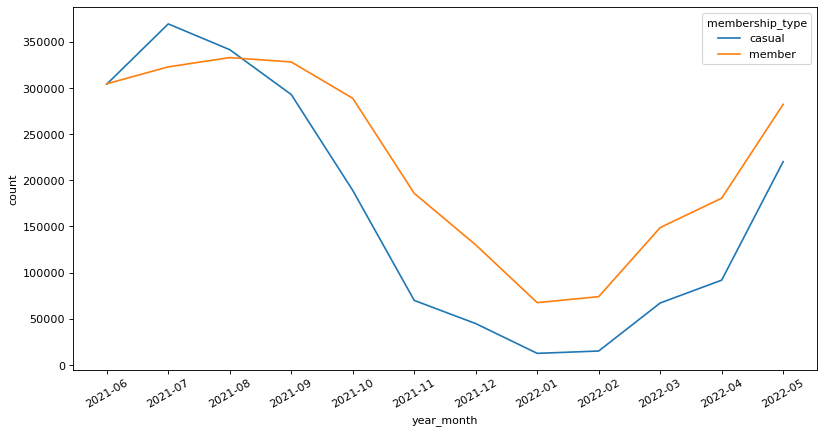

In [5]:
stacked = agg_df.stack().reset_index()
colname = ['year_month', 'membership_type', 'count']
stacked.columns = colname
stacked.head()

from matplotlib.pyplot import figure
figure(figsize=(12, 6), dpi=80)
ax = sns.lineplot(x = 'year_month', y = 'count', 
                  hue = 'membership_type', data = stacked , ci = False)
plt.xticks(rotation = 30)
plt.show()

#### Understand the usage pattern of different kinds of user

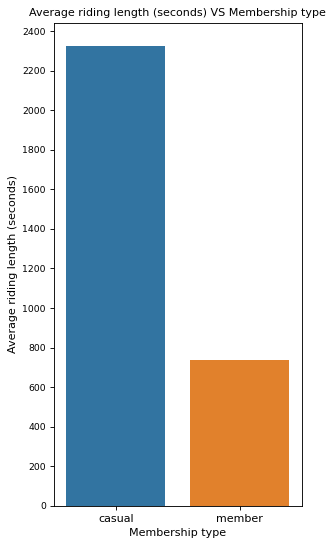

In [6]:
agg_member_ride_dur = df.groupby(['membership_type','rideable_type'], as_index=False).mean()[['membership_type','rideable_type'
                                                                            ,'duration_seconds']]

figure(figsize=(4, 8), dpi=80)
ax = sns.barplot(x = 'membership_type', y = 'duration_seconds', data = agg_member_ride_dur, ci = False)
plt.yticks(list(range(0,2600,200)),size = 'small')
plt.title('Average riding length (seconds) VS Membership type',size = 'medium')
plt.ylabel('Average riding length (seconds)',size = 'medium')
plt.xlabel('Membership type',size = 'medium')
plt.show()

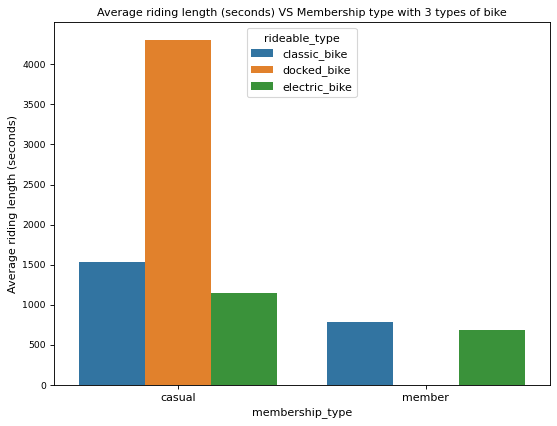

In [7]:
agg_member_ride_dur = df.groupby(['membership_type','rideable_type'], as_index=False).mean()[['membership_type','rideable_type'
                                                                            ,'duration_seconds']]

figure(figsize=(8, 6), dpi=80)
ax = sns.barplot(x = 'membership_type', y = 'duration_seconds', 
                  hue = 'rideable_type', data = agg_member_ride_dur)
# plt.xticks(hours)
plt.yticks(list(range(0,4200,500)),size = 'small')
plt.title('Average riding length (seconds) VS Membership type with 3 types of bike',size = 'medium')
plt.ylabel('Average riding length (seconds)',size = 'medium')
plt.show()

In [8]:
agg_membership_rideable = pd.crosstab(df['membership_type'],df['rideable_type'], margins=True)
agg_membership_rideable

# What is the difference among all types of bike???
# All member users never use docked_bike

rideable_type,classic_bike,docked_bike,electric_bike,All
membership_type,,,,
casual,1231583,273523,513807,2018913
member,1977186,0,669568,2646754
All,3208769,273523,1183375,4665667


In [9]:
agg_hour_membership = pd.crosstab(df['hour'],df['membership_type'])
agg_hour_membership

membership_type,casual,member
hour,,
0,41036,26156
1,29396,16967
2,19604,9551
3,10309,5551
4,6672,6462
5,9180,27656
6,20384,76304
7,38342,142782
8,52329,167092


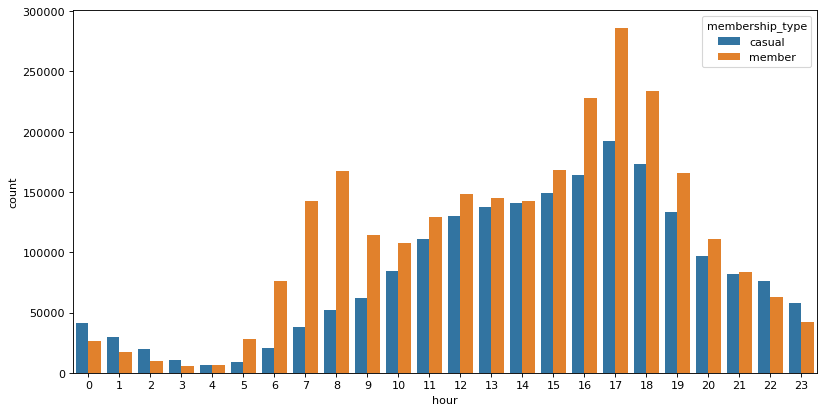

In [10]:
stacked_hour_membership = agg_hour_membership.stack().reset_index()
colname = ['hour', 'membership_type', 'count']
stacked_hour_membership.columns = colname

hours = [hour for hour, df in stacked_hour_membership.groupby('hour')]

figure(figsize=(12, 6), dpi=80)
ax = sns.barplot(x = 'hour', y = 'count', 
                  hue = 'membership_type', data = stacked_hour_membership , ci = False)
plt.xticks(hours)
plt.show()

In [11]:
df.groupby(['membership_type','day_of_week']).count()[['ride_id']]

ride_id
membership_type day_of_week         
casual          Friday        279814
                Monday        234470
                Saturday      447997
                Sunday        384566
                Thursday      236527
                Tuesday       218136
                Wednesday     217403
member          Friday        363984
                Monday        375320
                Saturday      350870
                Sunday        313971
                Thursday      402822
                Tuesday       424739
                Wednesday     415048

In [12]:
# sorting Non-alphabatical orders

week_order = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

agg_membership_weekday = df.groupby(
    ['membership_type','day_of_week'],
    as_index = False).count()[['membership_type','day_of_week','ride_id']]

sorter = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
sorterIndex = dict(zip(sorter,range(len(sorter))))

agg_membership_weekday['day_id'] = agg_membership_weekday['day_of_week'].map(sorterIndex)

agg_membership_weekday = agg_membership_weekday.rename(columns = {'ride_id':'count'})
agg_membership_weekday = agg_membership_weekday.sort_values(by='day_id')
agg_membership_weekday

,membership_type,day_of_week,count,day_id
3,casual,Sunday,384566,0
10,member,Sunday,313971,0
1,casual,Monday,234470,1
8,member,Monday,375320,1
5,casual,Tuesday,218136,2
12,member,Tuesday,424739,2
6,casual,Wednesday,217403,3
13,member,Wednesday,415048,3
4,casual,Thursday,236527,4
11,member,Thursday,402822,4


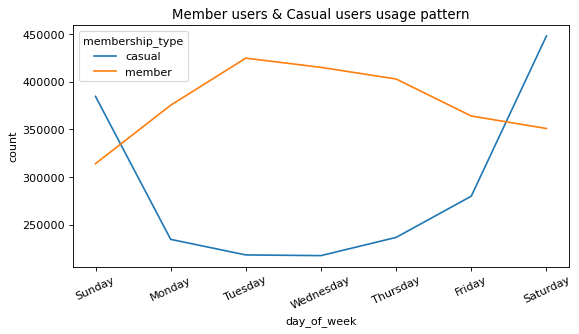

In [13]:
figure(figsize=(8, 4), dpi=80)
ax = sns.lineplot(x = 'day_of_week', y = 'count', 
                  hue = 'membership_type', data = agg_membership_weekday , ci = False)
plt.title('Member users & Casual users usage pattern')
plt.xticks(rotation = 25)
plt.show()

#### Understand only riders' avg riding duration vs day_of_week)

In [14]:
sorter = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
sorterIndex = dict(zip(sorter,range(len(sorter))))

df['day_id'] = df['day_of_week'].map(sorterIndex)

In [15]:
agg_weekday_duration = df.groupby(
    ['day_id','membership_type','day_of_week'],as_index = False
).mean()[['membership_type', 'day_of_week','duration_seconds']]

agg_weekday_duration

,membership_type,day_of_week,duration_seconds
0,casual,Sunday,2053.978958
1,member,Sunday,867.441614
2,casual,Monday,1806.528451
3,member,Monday,736.848905
4,casual,Tuesday,1570.072634
5,member,Tuesday,712.143330
6,casual,Wednesday,1597.483963
7,member,Wednesday,722.197252
8,casual,Thursday,1628.901825
9,member,Thursday,724.894122


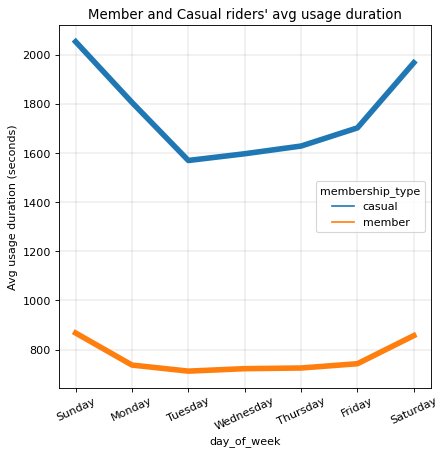

In [22]:
figure(figsize=(6, 6), dpi=80)
ax = sns.lineplot(x = 'day_of_week', y = 'duration_seconds', 
                  hue = 'membership_type',data = agg_weekday_duration , ci = False, linewidth = 5)
ax.grid(visible = True, which = 'major', color = 'black', linewidth = 0.1)
# ax.grid(b=True, which='minor', color='black', linewidth=0.075)
plt.title("Member and Casual riders' avg usage duration")
plt.ylabel('Avg usage duration (seconds)')
plt.xticks(rotation = 25,size = 'medium')
plt.show()